In [1]:
# imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
cf.go_offline()

In [2]:
# importing the data set
df = pd.read_csv('../data/diamonds_train.csv')

In [3]:
# examination the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [5]:
"""
- carat: Carat weight of the diamond (Peso en quilates del diamante)
- cut: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal.
- color: D being the best and J the wors
- clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1,
- depth % : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table%: The width of the diamond's table expressed as a percentage of its average diameter
- price:
- x: lengh mm
- y: width mm (ancho)
- z: depth in mm
"""


"\n- carat: Carat weight of the diamond (Peso en quilates del diamante)\n- cut: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal.\n- color: D being the best and J the wors\n- clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1,\n- depth % : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)\n- table%: The width of the diamond's table expressed as a percentage of its average diameter\n- price:\n- x: lengh mm\n- y: width mm (ancho)\n- z: depth in mm\n"

# Challenge 1: Exploratory Data Visualization Charts and Summary Statistics

The goal of this analysis is to understand the relationship between diamonds attributes (features) or group of attributes, and its price.

## Summary Statistics

In [6]:
# summary statistics data frame
df.describe().round(2)

,carat,depth,table,price,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,0.80,61.75,57.45,3928.44,5.73,5.73,3.54
std,0.48,1.43,2.23,3992.42,1.12,1.15,0.70
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,945.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2397.00,5.69,5.71,3.52
75%,1.04,62.50,59.00,5331.00,6.54,6.54,4.04
max,4.50,79.00,95.00,18823.00,10.23,58.90,8.06


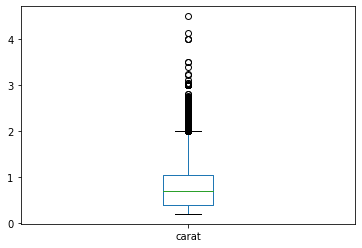

In [7]:
# box plot to see the distribution of the data.
df['carat'].plot(kind='box');

# conclusion: the most of the carat diamonds are between 0.4 and 1.04. There are some outliers up to 2.

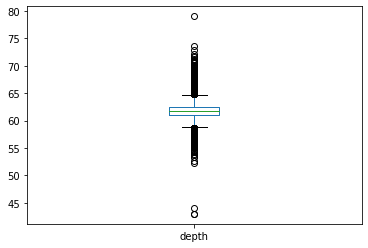

In [8]:
df['depth'].plot(kind='box');

# conclusion: there are outliers in both ways, and the mayority of the data are between 61 and 62.5

In [9]:
# correlations
df.corr().round(2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.97
depth,0.03,1.00,-0.29,-0.01,-0.03,-0.03,0.09
table,0.18,-0.29,1.00,0.13,0.20,0.18,0.16
price,0.92,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.97,0.09,0.16,0.87,0.98,0.96,1.00


In [10]:
# first impressions:
# price is very correlated with carat and size, but not much with table.
# ¿table is not related with any column?

## Data Visualization

### Question 1: How much correlated are the different columns?

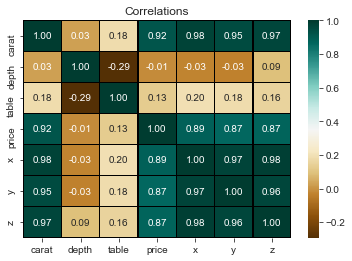

In [38]:
# correlation map
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True,annot_kws = {"size": 10},linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("Correlations")
plt.show()

In [34]:
# CONCLUSION: Price is correlated with z,y,x and carat. But table and dept not much.

### Question 2: How are correlated z, y, x and the price?

In [48]:
df.groupby(['x', 'y', 'z'], as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)

,x,y,z,price
30010,8.50,8.47,5.16,18823.0
28674,7.90,7.97,5.04,18818.0
30027,8.52,8.45,5.24,18797.0
29837,8.37,8.28,4.84,18795.0
29232,8.13,8.02,4.91,18795.0
...,...,...,...,...
300,4.00,4.05,2.39,338.0
18,3.87,3.78,2.49,337.0
421,4.05,4.07,2.31,327.0
154,3.95,3.98,2.43,326.0


In [49]:
# CONCLUSION: How much bigger is the diamond, more expensive is it.

### Question 3: How affect the carat to the price? (quilates)

In [50]:
# if we add carat to the last table, we can see that not always a high carat is the most expensive.
df.groupby(['x', 'y', 'z', 'carat'], as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)

,x,y,z,carat,price
33718,8.50,8.47,5.16,2.29,18823.0
32357,7.90,7.97,5.04,2.00,18818.0
33735,8.52,8.45,5.24,2.29,18797.0
33545,8.37,8.28,4.84,2.04,18795.0
32934,8.13,8.02,4.91,2.00,18795.0
...,...,...,...,...,...
2242,4.34,4.35,2.75,0.31,335.0
876,4.20,4.23,2.63,0.29,334.0
433,4.05,4.07,2.31,0.23,327.0
158,3.95,3.98,2.43,0.23,326.0


In [62]:
# let's study just carat and price column
carat_by_price = df.groupby('carat', as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)

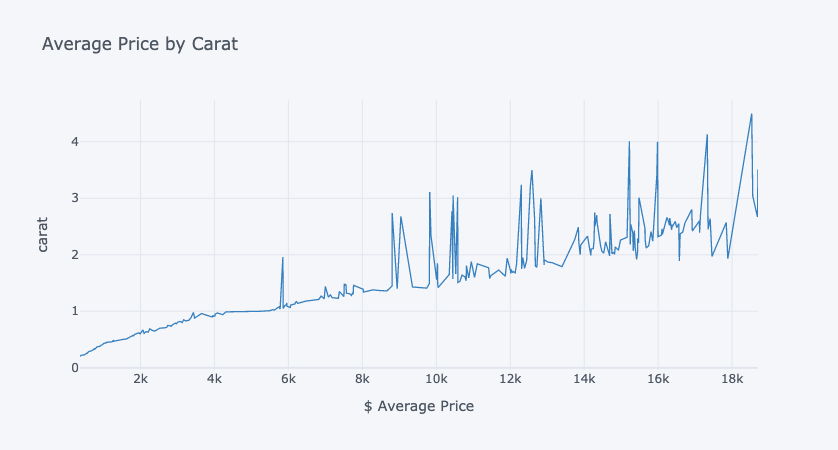

In [77]:
carat_by_price.iplot(kind='line',
                    x='price',
                    y='carat',
                    color='blue',
                    xTitle='$ Average Price',
                    yTitle='carat',
                    title='Average Price by Carat')

In [80]:
# CONCLUSION: The graph shows the positive correlation between carat and price of diamonds.
# But, in some cases, this is not true probably due tu the size of the diamon.

### Question 3: Which is the most expensive color?

In [25]:
# grouping by color and mean price
price_mean_by_color = df.groupby('color', as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False).round(2)

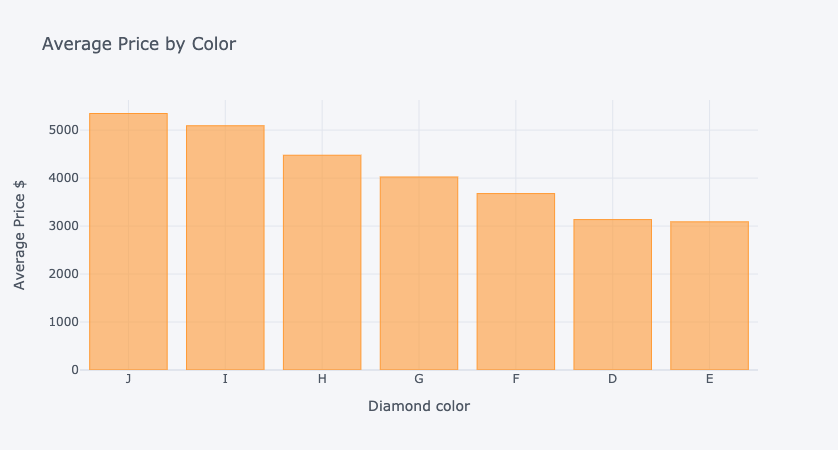

In [27]:
# using cf to make a plot.
price_mean_by_color.iplot(kind='bar',
                         x='color',
                         y='price',
                         title='Average Price by Color',
                         xTitle='Diamond color',
                         yTitle='Average Price $')

In [28]:
# CONCLUSION: J is the most expensive. D and E have very similar prices.

### Question 4: How cut affect the price?

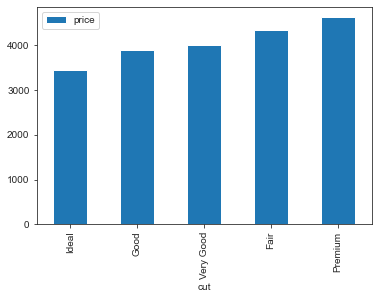

In [109]:
# gruping by cut and average price.
price_by_cut = df.groupby('cut', as_index=False).agg({'price':'mean'}).sort_values(by='price')

# plot using pandas
price_by_cut.plot.bar(x='cut', y='price');

In [92]:
# CONCLUSION: Premium diamonds are the most expensive ones and Ideal the cheapest.
# OJOOOO: No están ordenador por categoría y Ideal es de los buenos.

In [108]:
price_by_cut

,cut,price
2,Ideal,3436.112577
1,Good,3880.611794
4,Very Good,3994.444420
0,Fair,4333.271980
3,Premium,4617.322612


### Question 5: How clarity affect the price?

In [98]:
price_by_clarity = df.groupby('clarity', as_index=False).agg({'price':'mean'}).sort_values(by='price')

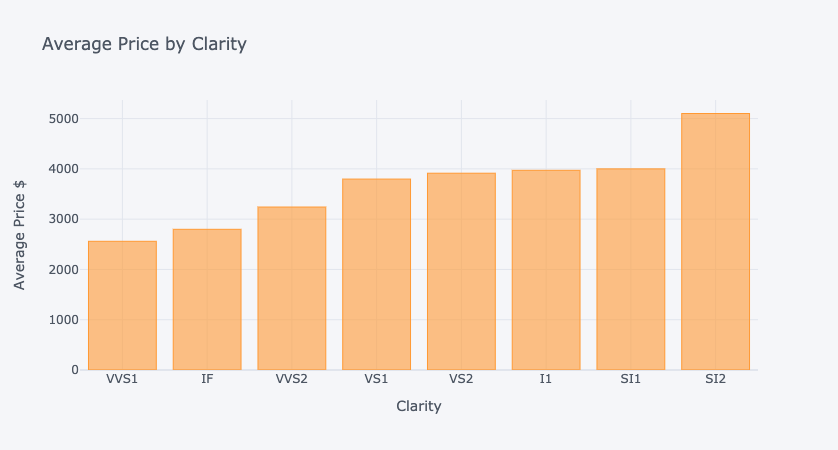

In [99]:
price_by_clarity.iplot(kind='bar',
                         x='clarity',
                         y='price',
                         title='Average Price by Clarity',
                         xTitle='Clarity',
                         yTitle='Average Price $')

In [100]:
# CONCLUSION: SI2 diamonds are the most expensive.